# Continuous Control

---

In this notebook, you can train the agent that solves the reacher environment from Unity ML agents. You can also just visualize the agent by skipping the training cell.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the repo instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# install for online workspace
#!pip -q install ./python

from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher_multi.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher_multi.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher_multi.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher_multi.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher_multi.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher_multi.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher_multi.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher_multi.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher_multi.app")
```

In [2]:
# load env locally
env = UnityEnvironment(file_name="Reacher_multi.app")

# load env on udacity workspace
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the agent

You can skip this cell, if you just want to watch the trained agent.

Episode 38	Average Score: 30.03
Environment solved in -62 episodes!	Average Score: 30.03


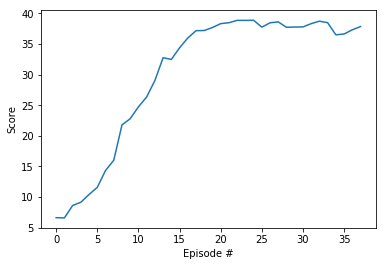

In [6]:
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=10)

def ddpg(n_episodes=100, max_t=1e8, eps_start=1.0, eps_end=0.01, eps_decay=0.99, num_agents=num_agents):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations               # get the current state
        score = np.zeros(1)
        agent.reset()
        t = 0
        while True:
        #for t in range(int(max_t)):
            # eps or no eps?
            action = agent.act(state, add_noise=True)
            #action = agent.act(state, add_noise=True, eps=eps)
            #print("Action at t={}: {}".format(t, action))
            env_info = env.step(action)[brain_name]     # send the action to the environment
            next_state = env_info.vector_observations   # get the next state
            reward = env_info.rewards                   # get the reward
            #print("Reward at t={}: {}".format(t, reward))
            done = env_info.local_done                  # see if episode has finished
            score += np.mean(reward)                    # update the score
            agent.step(state, action, reward, next_state, done)
            state = next_state                             # roll over the state to next time step
            t += 1
            if np.any(done):
                #print("Env done with length:", t)
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>30.0 and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_solved.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_solved.pth')
            torch.save(agent.actor_target.state_dict(), 'checkpoint_actor_t_solved.pth')
            torch.save(agent.critic_target.state_dict(), 'checkpoint_critic_t_solved.pth')
            break
    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
    torch.save(agent.actor_target.state_dict(), 'checkpoint_actor_t.pth')
    torch.save(agent.critic_target.state_dict(), 'checkpoint_critic_t.pth')
    return scores

scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch the agent in the Environment

Once this cell is executed, you will watch the agent's performance.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

In [5]:
# load the weights from file
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=10)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_solved.pth', map_location=lambda storage, loc: storage))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_solved.pth', map_location=lambda storage, loc: storage))
agent.actor_target.load_state_dict(torch.load('checkpoint_actor_t_solved.pth', map_location=lambda storage, loc: storage))
agent.critic_target.load_state_dict(torch.load('checkpoint_critic_t_solved.pth', map_location=lambda storage, loc: storage))
#agent.reset()

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
t = 0
while True:
    actions = agent.act(states, add_noise=False)         # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    t += 1
    if np.any(dones):                                  # exit loop if episode finished
        #print("Env done with length:", t)
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 38.38149914210662


When finished, you can close the environment.

In [6]:
env.close()

### End
